# 0.0. Imports

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from unidecode import unidecode
import folium

## 0.1. Helper Functions

In [10]:
def jupyter_settings():
    '''
    Faz algumas correcoes no notebook.
    '''
    %matplotlib inline
    
    pd.options.display.float_format = '{:20.3f}'.format
    pd.set_option('display.max_rows', 200)
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 60
    
    sns.set()

In [11]:
jupyter_settings()

## 0.2. Import Data

In [12]:
df = pd.read_csv('/home/tcbm/projs/case_geofusion/data/df_to_analysis.csv')

In [49]:
df_2 = pd.read_csv('/home/tcbm/projs/case_geofusion/data/df_to_analysis_2.csv')

In [108]:
data = '/home/tcbm/projs/case_geofusion/data/Limite_Bairro.geojson'

# 1.0. Bairros que mais faturam

In [50]:
df_10_faturamento = df.sort_values(by='faturamento', ascending=False).iloc[0:10, :]
df_10_faturamento_aux = df_2.sort_values(by='faturamento', ascending=False).iloc[0:10, :]

Text(0.5, 0, 'Bairro')

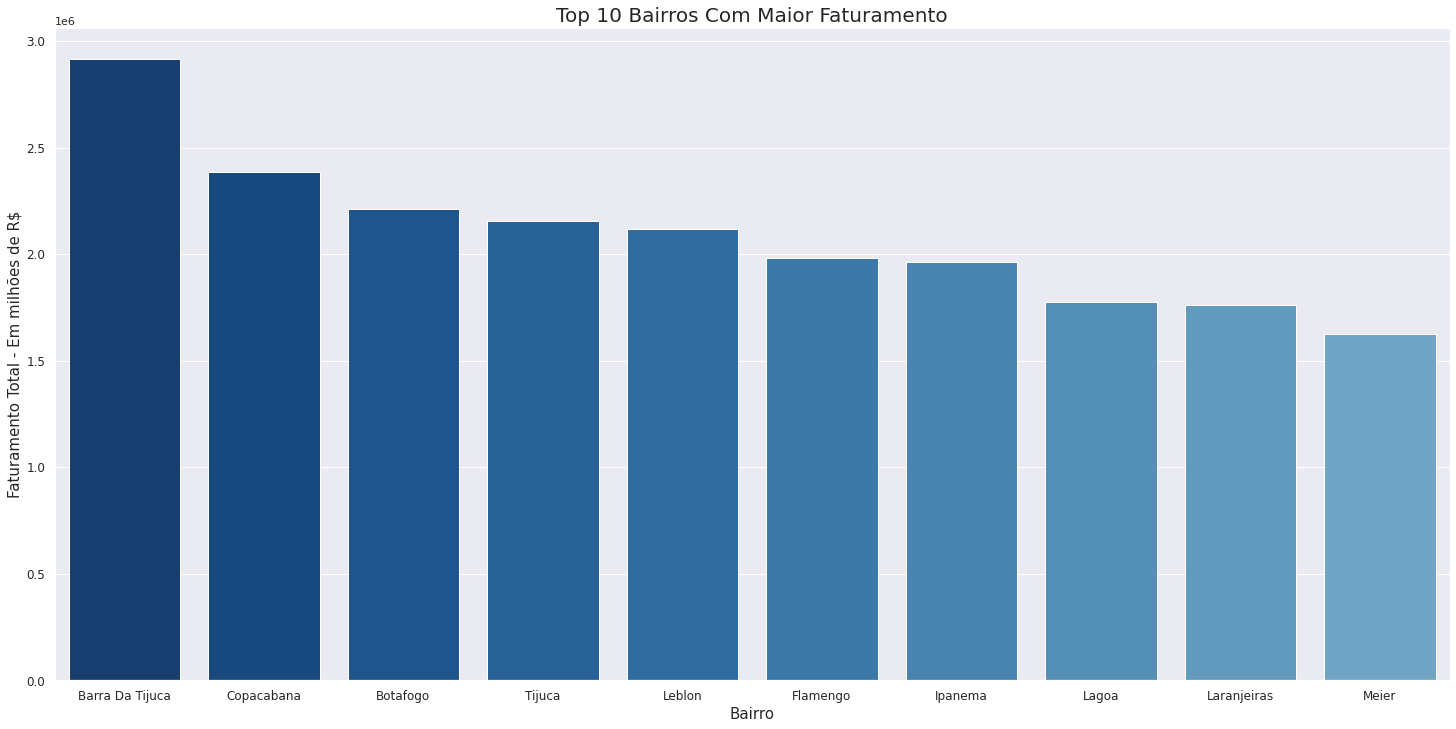

In [51]:
palette = sns.color_palette("Blues_r", 20)

sns.barplot(x = 'nome', y='faturamento', data=df_10_faturamento, palette=palette)

plt.title('Top 10 Bairros Com Maior Faturamento', fontsize=20)
plt.ylabel('Faturamento Total - Em milhões de R$', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Bairro', fontsize=15)

In [52]:
df_10_faturamento_aux.head()

codigo             nome          cidade estado            populacao  \
9    3304557131  Barra Da Tijuca  Rio de Janeiro     RJ           139761.000   
36   3304557018       Copacabana  Rio de Janeiro     RJ           150524.000   
15   3304557014         Botafogo  Rio de Janeiro     RJ            85229.000   
141  3304557030           Tijuca  Rio de Janeiro     RJ           168267.000   
82   3304557020           Leblon  Rio de Janeiro     RJ            47342.000   

     pop_ate9  pop_de10a14  pop_de15a19  pop_de20a24  pop_de25a34  ...  \
9       13038         5225         7432         8627        21914  ...   
36       8562         3727         6383         9168        21814  ...   
15       6278         2608         4410         5911        14697  ...   
141     13033         6405         9750        10968        23657  ...   
82       3134         1380         2131         2390         6177  ...   

     domicilios_c1  domicilios_c2  domicilios_d  domicilios_e  \
9             3437           1841             0          3897   
36           10982           5482           998          5122   
15            5289           3009           371          1853   
141          10755           6539          1280          3723   
82            1890            917           217          1595   

             renda_media          faturamento        subprefeitura  \
9              18084.000          2915612.000  Barra e Jacarepagua   
36              7381.000          2384494.000             Zona Sul   
15              8316.000          2211985.000             Zona Sul   
141             7844.000          2157079.000        Grande Tijuca   
82             14738.000          2119774.000             Zona Sul   

          regiao_adm                 area                  idh  
9    Barra da Tijuca             4815.060                0.972  
36        Copacabana              410.000                0.956  
15          Botafogo              479.900                0.952  
141           Tijuca             1006.560                0.926  
82             Lagoa              215.310                0.967  

[5 rows x 27 columns]

## 1.1. Calculo Pop + de 60 - Top 10 Bairros

### 1.1.1. Top 10

In [70]:
total = df_10_faturamento_aux['populacao'].sum()

In [71]:
parcial = df_10_faturamento_aux['pop_mais_de60'].sum() + df_10_faturamento_aux['pop_de50a59'].sum() + df_10_faturamento_aux['pop_de35a49'].sum()

In [72]:
round(parcial / total, 2) * 100

64.0

### 1.1.2. Resto

In [78]:
df_faturamento_aux = df_2.sort_values(by='faturamento', ascending=False).iloc[10:, :]

In [79]:
total = df_faturamento_aux['populacao'].sum()

In [80]:
parcial = df_faturamento_aux['pop_mais_de60'].sum() + df_faturamento_aux['pop_de50a59'].sum() + df_faturamento_aux['pop_de35a49'].sum()

In [81]:
round(parcial / total, 2) * 100

53.0

## 1.2. Calculo Pop - Domicilios - Top 10 Bairros

In [84]:
df_2['total_domicilios'] = (df_2['domicilios_a1'] + df_2['domicilios_a2'] +
                            df_2['domicilios_b1'] + df_2['domicilios_b2'] +
                            df_2['domicilios_c1'] + df_2['domicilios_c2'] +
                            df_2['domicilios_d'] + df_2['domicilios_e'])

### 1.2.1.  Top 10

In [85]:
df_faturamento_aux = df_2.sort_values(by='faturamento', ascending=False).iloc[:10, :]

In [86]:
total = df_faturamento_aux['total_domicilios'].sum()

In [87]:
parcial = (df_faturamento_aux['domicilios_a1'] + df_faturamento_aux['domicilios_a2'] +
          df_faturamento_aux['domicilios_b1'] + df_faturamento_aux['domicilios_b2']).sum()

In [88]:
round(parcial / total, 2) * 100

73.0

### 1.2.2.  Resto

In [89]:
df_faturamento_aux = df_2.sort_values(by='faturamento', ascending=False).iloc[10:, :]

In [90]:
total = df_faturamento_aux['total_domicilios'].sum()

In [91]:
parcial = (df_faturamento_aux['domicilios_a1'] + df_faturamento_aux['domicilios_a2'] +
          df_faturamento_aux['domicilios_b1'] + df_faturamento_aux['domicilios_b2']).sum()

In [92]:
round(parcial / total, 2)

0.31

## 1.3. Renda média

### 1.3.1.  Top 10

In [94]:
df_faturamento_aux = df_2.sort_values(by='faturamento', ascending=False).iloc[:10, :]

df_faturamento_aux['renda_total'] = df_faturamento_aux['populacao'] * df_faturamento_aux['renda_media']

df_faturamento_aux[['nome', 'populacao', 'renda_media']]

renda_total = df_faturamento_aux['renda_total'].sum()
renda_total

populacao_total = df_faturamento_aux['populacao'].sum()
populacao_total

top_10 = renda_total / populacao_total

In [95]:
round(top_10, 2)

10802.69

## Demais

In [96]:
df_faturamento_aux = df_2.sort_values(by='faturamento', ascending=False).iloc[10:, :]

df_faturamento_aux['renda_total'] = df_faturamento_aux['populacao'] * df_faturamento_aux['renda_media']

renda_total = df_faturamento_aux['renda_total'].sum()
renda_total

populacao_total = df_faturamento_aux['populacao'].sum()
populacao_total

demais = renda_total / populacao_total

In [97]:
demais

2246.198514110328

In [99]:
round(top_10 / demais)

5

## 1.4. IDH

### 1.4.1. top 10

In [100]:
df_faturamento_aux = df.sort_values(by='faturamento', ascending=False).iloc[:10, :]

In [101]:
idh_medio_top_10 = df_faturamento_aux['idh'].mean()

In [104]:
round(idh_medio_top_10, 3)

0.954

### 1.4.2. demais

In [105]:
df_faturamento_aux = df.sort_values(by='faturamento', ascending=False).iloc[10:, :]

In [106]:
idh_medio_demais = df_faturamento_aux['idh'].mean()

In [107]:
round(idh_medio_demais, 3)

0.835

### 1.5. Map Faturamento

In [119]:
data_final = unidecode(open(data).read())

In [120]:
m = folium.Map(location=[-22.914701478392942, -43.44598971383762], zoom_start=10, tiles='cartodbpositron')

folium.Choropleth(
    geo_data=data_final,
    name='choropleth',
    data=df,
    columns=['nome', 'faturamento'],
    key_on="properties.NOME",
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Faturamento',
    nan_fill_color='#f2f4fd'
).add_to(m)

In [121]:
m

# 2.0. IDH

In [124]:
# criando auxiliar para plotar categorias de idh por faturamento
aux = df.loc[:, ['idh', 'faturamento']]
aux['idh'] = pd.cut(df['idh'], bins=5)
aux_2 = aux.groupby('idh').mean().reset_index()

Text(0.5, 1.0, 'Correlação')

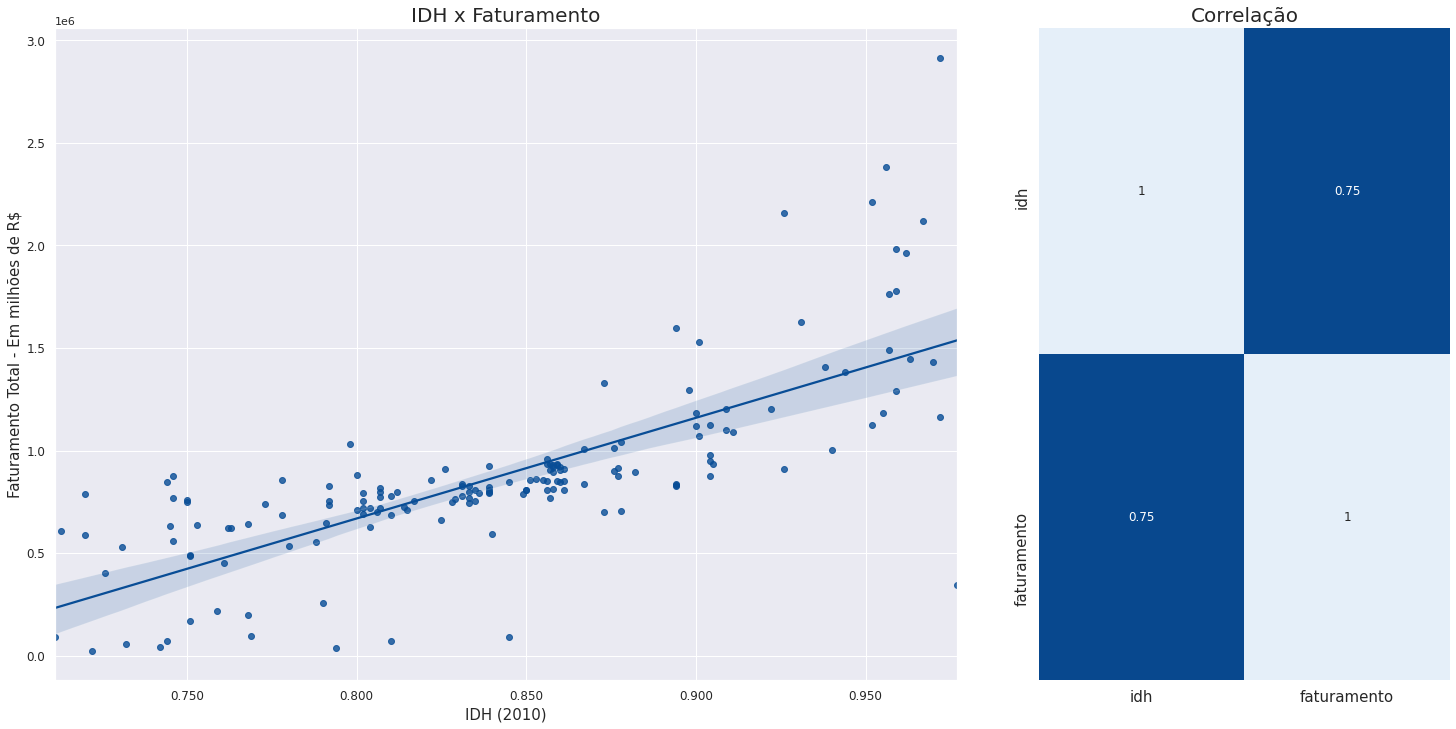

In [125]:
grid = plt.GridSpec(1, 3)

# RegPlot
# plot regressão entre idh e faturamento
plt.subplot(grid[0, :2])
sns.regplot(x='idh', y='faturamento', data=df, color='#084d96')

plt.title('IDH x Faturamento', fontsize=20)
plt.ylabel('Faturamento Total - Em milhões de R$', fontsize=15)
plt.xlabel('IDH (2010)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
 
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%0.3f'))

# Heatmap
plt.subplot(grid[0, -1])
cmap = sns.color_palette("Blues_r", 10)

sns.heatmap(df[['idh', 'faturamento']].corr(method='pearson'), annot=True, cbar=False, cmap=cmap)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Correlação', fontsize=20)

# 3.0. Renda Media

In [126]:
aux_1 = df.loc[df['renda_media'] < 10000, :]

Text(0.5, 1.0, 'Correlação')

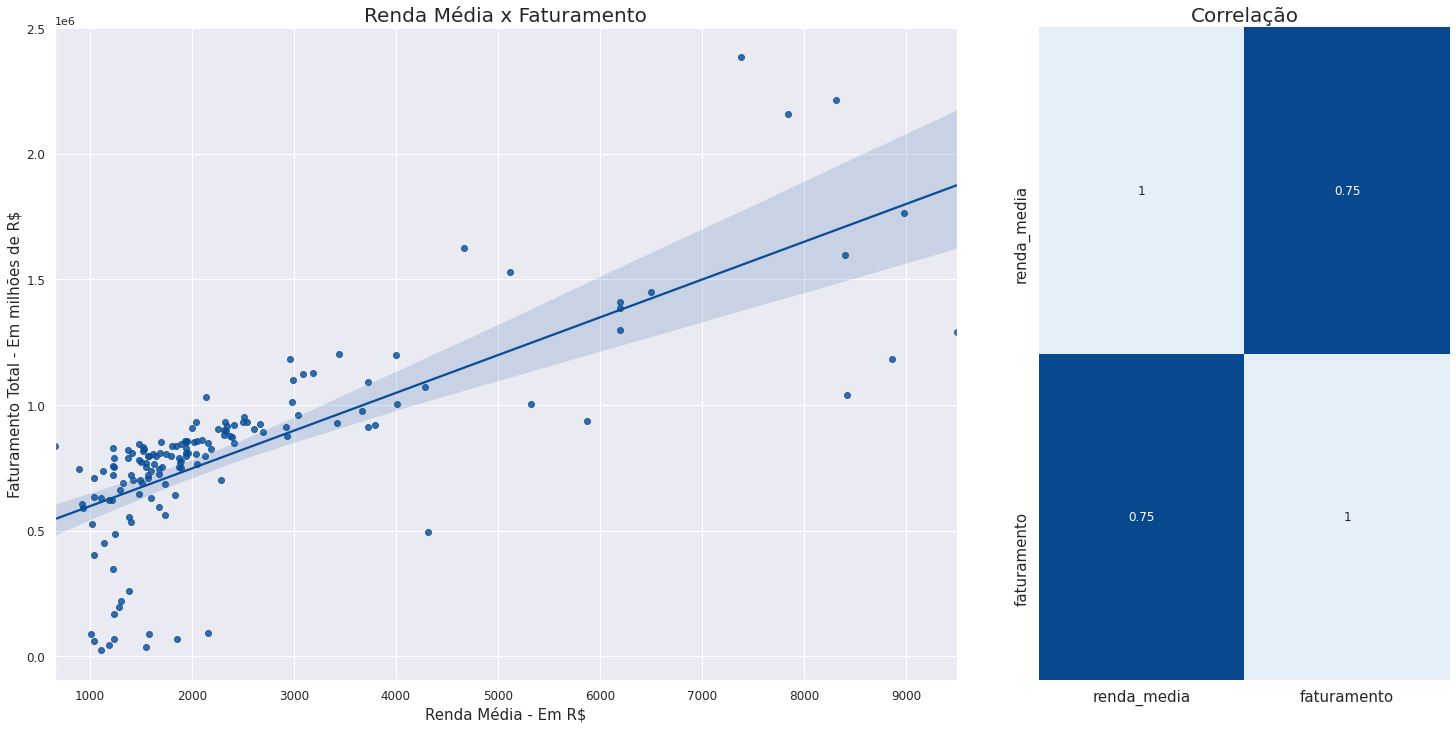

In [127]:
grid = plt.GridSpec(1, 3)

# RegPlot
# plot regressão entre idh e faturamento
plt.subplot(grid[0, :2])
sns.regplot(x='renda_media', y='faturamento', data=aux_1, color='#084d96')

plt.title('Renda Média x Faturamento', fontsize=20)
plt.ylabel('Faturamento Total - Em milhões de R$', fontsize=15)
plt.xlabel('Renda Média - Em R$', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Heatmap
plt.subplot(grid[0, -1])
cmap = sns.color_palette("Blues_r", 10)

sns.heatmap(aux_1[['renda_media', 'faturamento']].corr(method='pearson'), annot=True, cbar=False, cmap=cmap)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Correlação', fontsize=20)